In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
# matplotlib의 rc를 import하면서 폰트 한글 설정 가능
from matplotlib import rc
rc('font', family='Malgun Gothic')
%matplotlib inline
from scipy import stats as ss
import seaborn as sns
from statsmodels import api as sma
from statsmodels.formula import api as smfa
from statsmodels import regression as smr
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'

In [13]:
death = np.array([2, 1, 2, 4, 2, 5, 3, 3, 5, 6, 3, 8, 3,
                  3, 6, 3, 6, 5, 3, 5, 2, 6, 2, 3, 4, 3,
                  2, 9, 2, 2, 3, 2, 7, 3, 2, 10, 6, 2, 3,
                  1, 2, 3, 3, 4, 3, 2, 6, 2, 2, 3, 2, 3,
                  4, 3, 2, 3, 5, 2, 5, 5, 3, 4, 3, 6, 2,
                  1, 2, 3, 2, 6, 3, 3, 6, 3, 2, 3, 6, 4,
                  6, 5, 3, 5, 6, 2, 6, 3, 2, 3, 2, 6, 2,
                  6, 3, 3, 2, 6, 9, 6, 3, 6, 6, 2, 3, 2,
                  3, 5, 3, 5, 2, 3, 2, 3, 3, 1, 3, 3, 2,
                  3, 3, 4, 3, 6, 6, 3, 3, 3, 2, 3, 3, 6])
# 혹은 Series 생성 이후 value_counts() 메서드 활용
(pd.Series(death)
.value_counts(sort=False)
.rename(dict(enumerate(["감염","각종암","순환기","호흡기","소화기",
               "사고사","비뇨기","정신병","노환","신경계"], 1)))\
)
# pd.crosstab() 함수를 통해 도수분포로 배치
# 그냥 death를 집어넣는게 아니라 pd.Series(death)를 집어넣어야 axis가 안꼬임
table = pd.crosstab(index=pd.Series(death), colnames=['질병'], columns='도수')
table.index = ["감염","각종암","순환기","호흡기","소화기",
               "사고사","비뇨기","정신병","노환","신경계"]
table

col_0,도수
감염,4
각종암,33
순환기,48
호흡기,7
소화기,11
사고사,22
비뇨기,1
정신병,1
노환,2
신경계,1


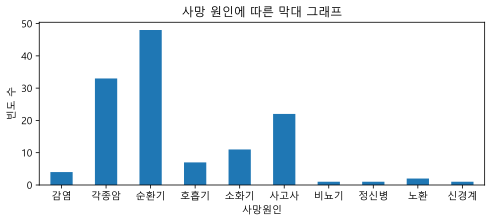

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
# legend=False 인자 전달하여 범례 제거 가능
# color 파라미터는 리스트로도 전달 가능
table.plot.bar(rot=0, legend=False, ax=ax)
ax.set_xlabel('사망원인')
ax.set_ylabel('빈도 수')
ax.set_title('사망 원인에 따른 막대 그래프')
# plt.rc() 함수 사용하여 글씨 크기들 조절 가능
plt.rc('font', size=8)

Text(0.5, 1.0, '사망 원인에 따른 막대 그래프')

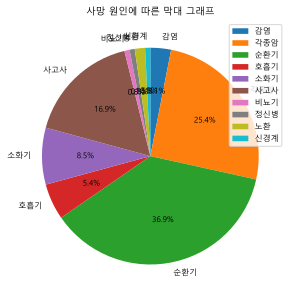

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
# squeeze()를 통해 Series로 바꿔주거나, 혹은 subplots=True 인자 전달
table.plot.pie(subplots=True, startangle=90, counterclock=False, autopct='%.1f%%', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('사망 원인에 따른 막대 그래프')

In [50]:
table2 = pd.DataFrame(death, columns=['질병코드'])
table2 = table2.replace(dict(enumerate(["감염", "각종암", "순환기", "호흡기", "소화기", "사고사", "비뇨기", "정신병", "노환", "신경계"], 1)))
table_index2 = table2.value_counts(normalize=True).index[:3]
# 왜 MultiIndex로 나오지..?
# 다른 방식으로 시도 → reset_index() 활용
(table2
.value_counts()
.reset_index(name='빈도')
.loc[:3, '질병코드']
.tolist()
)

['순환기', '각종암', '사고사', '소화기']

<AxesSubplot:>

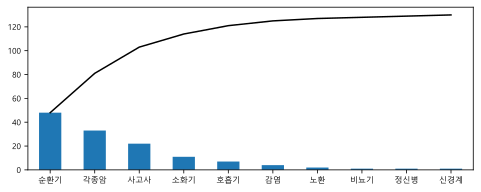

In [51]:
# pandas 및 matplotlib만 활용하여 파레토차트 그리기 -> 같은 ax에 바 그래프와 선 그래프 삽입
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
(table
.sort_values('도수', ascending=False)
.assign(누적도수=lambda df: df['도수'].cumsum())
['도수']
.plot.bar(ax=ax, rot=0)
)
(table
.sort_values('도수', ascending=False)
.assign(누적도수=lambda df: df['도수'].cumsum())
['누적도수']
.plot(ax=ax, color='black', rot=0)
)

<AxesSubplot:ylabel='Frequency'>

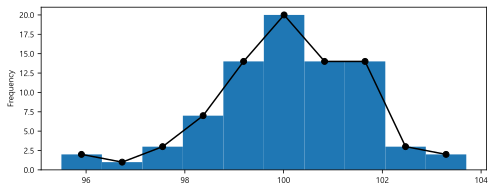

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
drink = np.array([101.8, 101.5, 101.8, 102.6, 101, 96.8, 102.4, 100, 98.8, 98.1,
                  98.8, 98, 99.4,95.5, 100.1, 100.5, 97.4, 100.2, 101.4, 98.7,
                  101.4, 99.4, 101.7, 99, 99.7, 98.9, 99.5, 100, 99.7, 100.9,
                  99.7, 99, 98.8, 99.7, 100.9, 99.9, 97.5, 101.5, 98.2, 99.2,
                  98.6, 101.4, 102.1, 102.9, 100.8, 99.4, 103.7, 100.3, 100.2, 101.1,
                  101.8, 100, 101.2, 100.5, 101.2, 101.6, 99.9, 100.5, 100.4, 98.1,
                  100.1, 101.6, 99.3, 96.1, 100, 99.7, 99.7, 99.4, 101.5, 100.9,
                  101.3, 99.9, 99.1, 100.7, 100.8, 100.8, 101.4, 100.3, 98.4, 97.2])
# pandas Series() 함수 이용하여 바로 히스토그램 생성 가능
pd.Series(drink).plot.hist(bins=10, ax=ax)
# pandas cut() 함수 이용하여 구간 설정 가능
drink_cut = (pd.DataFrame(drink, columns=['용량'])
.assign(구간=lambda df: pd.cut(df['용량'], bins=10))
['구간']
.value_counts(sort=False)
)
# cut() 함수를 value_counts() 메서드에 연결했을 때 인덱스는 pandas Interval 객체 -> mid 속성 이용하여 중앙값 반환 가능
drink_cut.index = [drink_cut.index[i].mid for i in range(len(drink_cut.index))]
drink_cut.plot(color='black', marker='o', ax=ax)

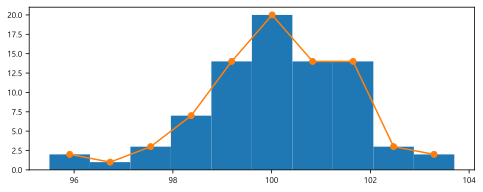

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
# pyplot의 hist() 함수로 출력했을 때 iterable 객체 생성 -> 언패킹 가능
# 도수, 각 구간값, 히스토그램의 튜플로 결과 출력
n, bins, patches = plt.hist(drink)
x = [(bins[i] + bins[i-1]) / 2 for i in range(1, 11)]
plt.plot(x, n, marker='o')